#Task 1: Predictive Modeling (Regression)
In this task, we will build a model to predict a continuous value. We'll use the California Housing dataset, which is readily available in scikit-learn. The goal is to predict the median house value for California districts.

Training set shape: (16512, 8)
Testing set shape: (4128, 8)
--- Linear Regression ---
Mean Squared Error (MSE): 0.5559
R-squared (R²): 0.5758

--- Decision Tree ---
Mean Squared Error (MSE): 0.4952
R-squared (R²): 0.6221

--- Random Forest ---
Mean Squared Error (MSE): 0.2554
R-squared (R²): 0.8051

--- Model Comparison ---
                        MSE  R-squared
Linear Regression  0.555892   0.575788
Decision Tree      0.495235   0.622076
Random Forest      0.255368   0.805123


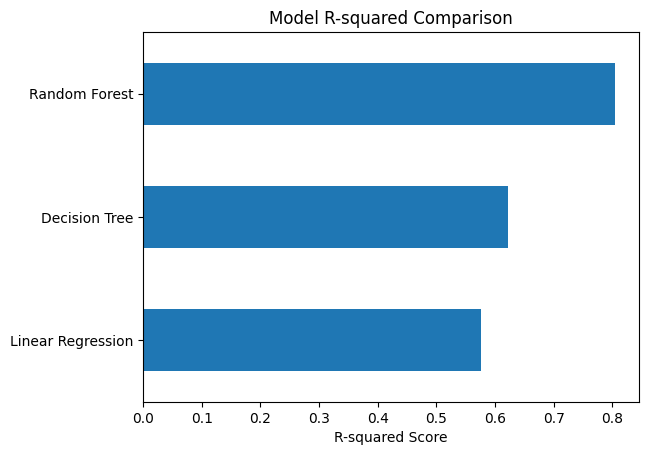

In [1]:
# 1. Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing

# 2. Load and prepare the dataset
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = pd.Series(housing.target, name='MedHouseVal')

# 3. Split the dataset into training and testing sets
# We use 80% for training and 20% for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

# 4. Initialize the models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

# 5. Train and evaluate each model
results = {}
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store results
    results[name] = {'MSE': mse, 'R-squared': r2}
    print(f"--- {name} ---")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"R-squared (R²): {r2:.4f}\n")

# 6. Compare performance
results_df = pd.DataFrame(results).T
print("--- Model Comparison ---")
print(results_df)

# Visualize the R-squared scores
results_df['R-squared'].sort_values().plot(kind='barh', title='Model R-squared Comparison')
plt.xlabel('R-squared Score')
plt.show()

#Task 2: Classification with Logistic Regression
For this task, we will build a classifier to predict the species of an iris flower based on its sepal and petal measurements. We'll use the classic Iris dataset.

--- Logistic Regression Evaluation ---
Accuracy: 0.9111

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      0.93      0.88        15
   virginica       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45


--- Logistic Regression Accuracy ---
0.9111

--- Random Forest Accuracy ---
0.8889

--- Support Vector Machine (SVM) Accuracy ---
0.9333


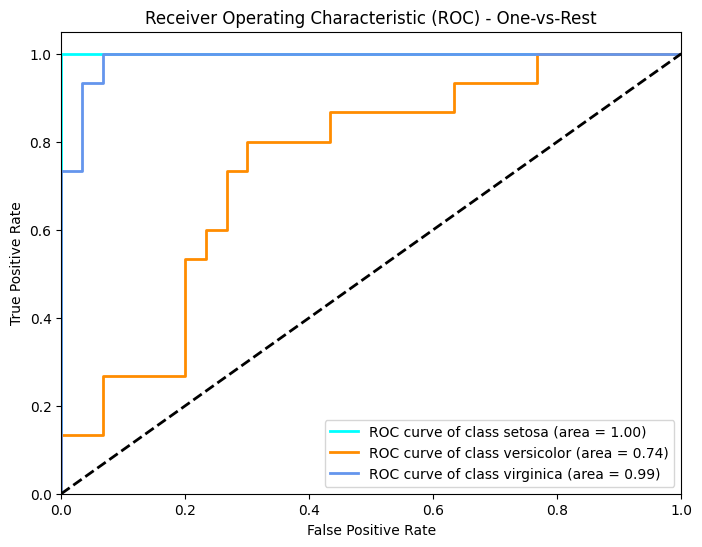

In [2]:
# 1. Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, RocCurveDisplay
from sklearn.preprocessing import label_binarize

# 2. Load and prepare data
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='species')
class_names = iris.target_names

# 3. Preprocess the data
# Split data before scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Train and evaluate the Logistic Regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_lr = log_reg.predict(X_test_scaled)

# Evaluate Logistic Regression
print("--- Logistic Regression Evaluation ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr, target_names=class_names))

# 5. Compare with other classifiers
classifiers = {
    'Logistic Regression': log_reg, # Already trained
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine (SVM)': SVC(probability=True, random_state=42)
}

for name, clf in classifiers.items():
    if name != 'Logistic Regression': # Avoid re-training
        clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    print(f"\n--- {name} Accuracy ---")
    print(f"{accuracy_score(y_test, y_pred):.4f}")

# 6. Visualize ROC Curve for Logistic Regression (One-vs-Rest)
# Binarize the output for multiclass ROC
y_bin = label_binarize(y, classes=[0, 1, 2])
n_classes = y_bin.shape[1]

# Re-split binarized labels
y_train_bin, y_test_bin = train_test_split(y_bin, test_size=0.3, random_state=42, stratify=y)

# We need to re-train the model on binarized data for a OneVsRest approach to get decision scores
from sklearn.multiclass import OneVsRestClassifier
clf_roc = OneVsRestClassifier(LogisticRegression(random_state=42))
y_score = clf_roc.fit(X_train_scaled, y_train).decision_function(X_test_scaled)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(8, 6))
colors = ['aqua', 'darkorange', 'cornflowerblue']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {class_names[i]} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - One-vs-Rest')
plt.legend(loc="lower right")
plt.show()

#Task 3: Clustering (Unsupervised Learning)
In this task, we will perform K-Means clustering. Since this is unsupervised learning, we don't use labels. We'll generate synthetic data to clearly visualize the clusters and use the "elbow method" and "silhouette score" to find the optimal number of clusters.

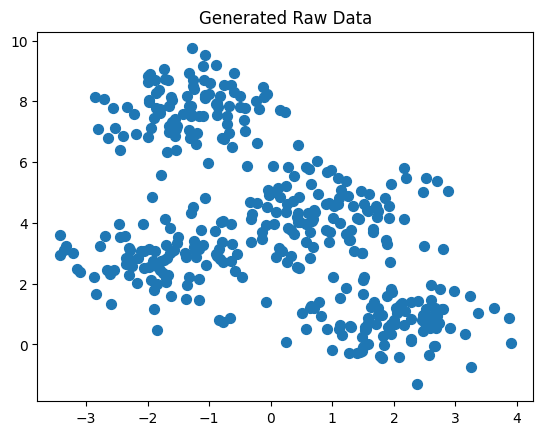

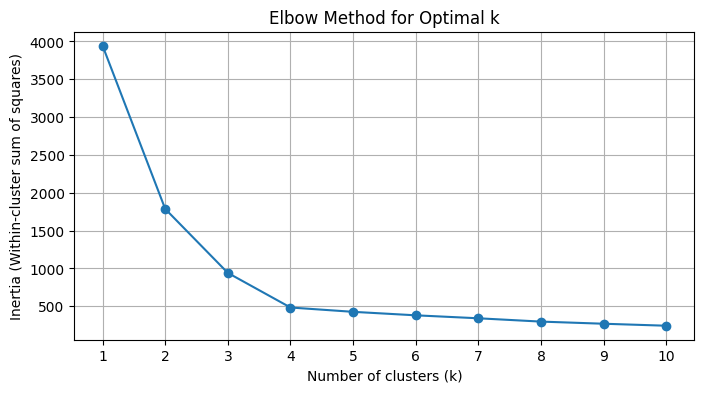

For k=2, the silhouette score is 0.4982
For k=3, the silhouette score is 0.5151
For k=4, the silhouette score is 0.5782
For k=5, the silhouette score is 0.4998
For k=6, the silhouette score is 0.4547
For k=7, the silhouette score is 0.3931
For k=8, the silhouette score is 0.3404
For k=9, the silhouette score is 0.3394
For k=10, the silhouette score is 0.3414


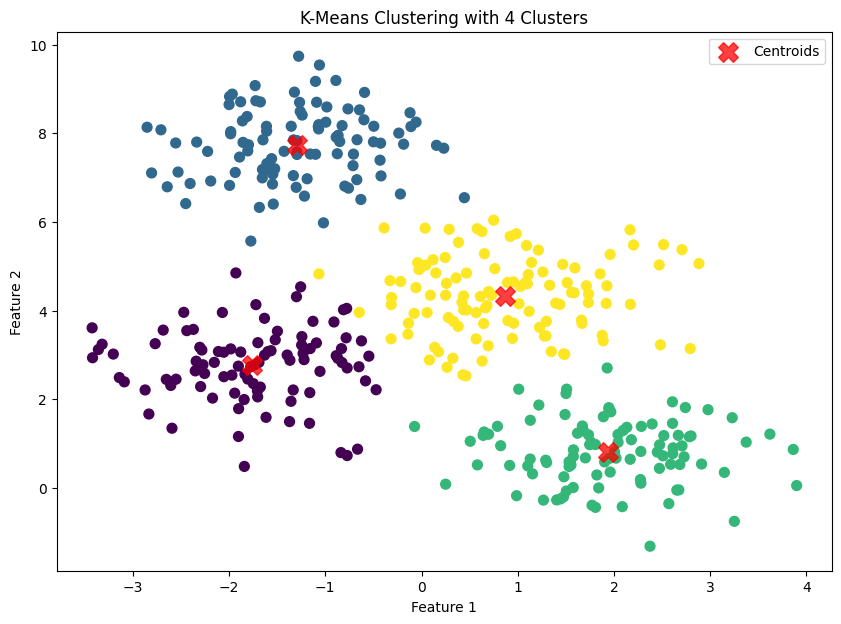

In [3]:
# 1. Import Libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# 2. Generate synthetic data
# We create 4 distinct groups for demonstration purposes.
X, y_true = make_blobs(n_samples=400, centers=4, cluster_std=0.80, random_state=0)

# Visualize the raw data
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Generated Raw Data")
plt.show()

# 3. Find the optimal number of clusters (k)
# Method 1: The Elbow Method
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Within-cluster sum of squares)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# Method 2: Silhouette Score
silhouette_scores = []
for k in range(2, 11): # Silhouette score is not defined for k=1
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)
    print(f"For k={k}, the silhouette score is {score:.4f}")

# 4. Apply K-Means with the optimal k
# Both methods suggest k=4 is the optimal number of clusters.
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X)

# 5. Visualize the clusters
plt.figure(figsize=(10, 7))
# Plot the data points, colored by their assigned cluster
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

# Plot the cluster centers (centroids)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centroids')

plt.title(f'K-Means Clustering with {optimal_k} Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# If data had more than 2 dimensions, we would use PCA for visualization:
# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(X)
# plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis')
# plt.title('K-Means Clusters (Visualized with PCA)')
# plt.show()